# PMAFI - Prospective analysis of the collected sessions

In this notebook we initially analyze the data generated during the recorded video-session. A count-based validation is carried out along with a visualizaton of the sessions.

In [1]:
import pandas as pd
import json
import requests
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

## 1. Read data from server

In [2]:
sessions_json = json.loads(requests.get("https://recoface-2e369.firebaseio.com/sessions.json").text)

In [3]:
sessions_json

{'2020-11-30': {'10:01:05:339': {'event': 'front',
   'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:06:147': {'event': 'neutral', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:06:149': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:07:165': {'event': 'front', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:19:183': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:20:173': {'event': 'front', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:47:177': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:48:179': {'event': 'front', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:52:166': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:55:167': {'event': 'front', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:02:19:180': {'event': 'surprised',
   'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:02:19:194': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:02:30:180': {'event': 'front', 'user'

## 2. Convert to dataframe

In [4]:
actions= []

for day in sessions_json.keys():
    day_sessions= sessions_json[day]
    for t in day_sessions.keys():
        action = day_sessions[t]
        event = action['event']
        user = action['user']
        timestamp = datetime. strptime('{} {}'.format(day,t), '%Y-%m-%d %H:%M:%S:%f')
    
        actions.append((0, timestamp, user, event))
        
df_= pd.DataFrame.from_records(actions, columns='session_id timestamp user action'.split())
df_['timestamp']= pd.to_datetime(df_['timestamp'], format='%Y-%m-%d %H:%M:%S:%f')


In [5]:
df_= df_.sort_values('timestamp')

---------------------------------------------

*Edit the threshold to split sessions.*

In [6]:
time_threshold = 30 #in minutes

----------------------------------------------

In [7]:
nsessions_per_user ={}
prev_timestamp_per_user = {}
for i in df_.index:
    r = df_.loc[i]
    user = r['user']
    timestamp = r['timestamp']
    session= nsessions_per_user.get(user,0)
    prev_timestamp= prev_timestamp_per_user.get(user,None) 
    if prev_timestamp:
        time_diff_in_min = (timestamp - prev_timestamp).total_seconds()/60
        if time_diff_in_min > time_threshold:
            #print(user, time_diff_in_min, time_threshold)
            session +=1
    df_.loc[i,'session_id']=session
    prev_timestamp_per_user[user] = timestamp
    nsessions_per_user[user]=session    

## 3. Inspect the dataframe

First rows of the dataframe

In [8]:
df_.head()

,session_id,timestamp,user,action
3790,0,2020-11-30 01:00:00.450,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,angry
3791,0,2020-11-30 01:00:00.519,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,front
3792,0,2020-11-30 01:00:01.127,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,happy
3793,0,2020-11-30 01:00:01.140,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,move
3794,0,2020-11-30 01:00:01.442,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,front


Last rows of the dataframe

In [9]:
df_.tail()

,session_id,timestamp,user,action
46699,1,2021-03-24 20:02:54.789,q5GbarKftvP4hdXaZ4IgRDdD1zm2,front
46700,1,2021-03-24 20:02:55.255,q5GbarKftvP4hdXaZ4IgRDdD1zm2,move
46701,1,2021-03-24 20:02:55.367,q5GbarKftvP4hdXaZ4IgRDdD1zm2,front
46702,1,2021-03-24 20:02:56.243,q5GbarKftvP4hdXaZ4IgRDdD1zm2,move
46703,1,2021-03-24 20:02:56.410,q5GbarKftvP4hdXaZ4IgRDdD1zm2,front


In [10]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46704 entries, 3790 to 46703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   session_id  46704 non-null  int64         
 1   timestamp   46704 non-null  datetime64[ns]
 2   user        46704 non-null  object        
 3   action      46704 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ MB


### Emotions and actions included in all the sessions

In [11]:
print(f"All the registered emotions/actions are {df_['action'].unique()}")

All the registered emotions/actions are ['angry' 'front' 'happy' 'move' 'hit' 'end' 'start' 'out' 'neutral' 'sad'
 'surprised' 'fearful' 'disgusted' 'Theory' 'Practice' 'Doubts'
 'NonAcInfo' 'AcInfo']


### Users included in all the sessions

In [12]:
nusers = df_['user'].nunique()
print(f"The number of users is {nusers}")

The number of users is 10


In [13]:
users_lst = [u+'\n' for u in df_['user'].unique()]
print(f"The list of all users in the system is: {users_lst}")

The list of all users in the system is: ['L6BaTzTY5AOuDbvyHAkIgAfq6yt1\n', '20YmnmPfd0Y7YSE9WgXxK2zH9BL2\n', 'i4L9mnNc9gec7ZW1pAbn1JGk5cm1\n', 'UgYODV0Eo2dywm0OTm1twMYNDoL2\n', 'C0kiehExWQV0FVQGP7tU2bKUQws1\n', 'fOzH7QegbIdZ4tzwiVXKaeehYTD3\n', 'iwWrrzzmzDgc5X6Y1Ob0QhZLvXo1\n', 'MWMEENo7sGWbrlVrVhfT1YNE78b2\n', 'q5GbarKftvP4hdXaZ4IgRDdD1zm2\n', 'sbXzlyk91EPaT9pIpne7PCBEJsE3\n']


### Sessions per user

In [14]:
for u in df_['user'].unique():
    user_df = df_[df_['user']==u]
    nsessions = user_df['session_id'].nunique()
    print(f'User {u} has {nsessions} sessions.')
                  

User L6BaTzTY5AOuDbvyHAkIgAfq6yt1 has 15 sessions.
User 20YmnmPfd0Y7YSE9WgXxK2zH9BL2 has 6 sessions.
User i4L9mnNc9gec7ZW1pAbn1JGk5cm1 has 3 sessions.
User UgYODV0Eo2dywm0OTm1twMYNDoL2 has 11 sessions.
User C0kiehExWQV0FVQGP7tU2bKUQws1 has 4 sessions.
User fOzH7QegbIdZ4tzwiVXKaeehYTD3 has 14 sessions.
User iwWrrzzmzDgc5X6Y1Ob0QhZLvXo1 has 1 sessions.
User MWMEENo7sGWbrlVrVhfT1YNE78b2 has 1 sessions.
User q5GbarKftvP4hdXaZ4IgRDdD1zm2 has 2 sessions.
User sbXzlyk91EPaT9pIpne7PCBEJsE3 has 1 sessions.


In [15]:
session_stats = []
for u in df_['user'].unique():
    user_df = df_[df_['user']==u]
    for s in user_df['session_id'].unique():
        user_session_df = user_df[user_df['session_id']==s]
        start = user_session_df.iloc[0]['timestamp']
        end = user_session_df.iloc[-1]['timestamp']
        session_stats.append((u,s,start,end, round((end-start).total_seconds()/60,1)))
        
session_stats_df = pd.DataFrame.from_records(session_stats, columns='user session_id start end duration(m)'.split())


Statistics of the sessions

In [16]:
session_stats_df

,user,session_id,start,end,duration(m)
0,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,0,2020-11-30 01:00:00.450,2020-11-30 01:14:07.382,14.1
1,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,1,2020-11-30 12:50:21.823,2020-11-30 12:59:59.636,9.6
2,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,2,2020-12-12 23:54:49.132,2020-12-12 23:57:35.290,2.8
3,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,3,2020-12-13 01:16:06.411,2020-12-13 01:16:34.368,0.5
4,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,4,2020-12-13 02:04:42.263,2020-12-13 02:06:34.117,1.9
5,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,5,2020-12-17 00:52:20.467,2020-12-17 03:18:05.391,145.7
6,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,6,2020-12-17 13:15:45.789,2020-12-17 13:29:32.610,13.8
7,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,7,2020-12-17 15:52:50.525,2020-12-17 16:01:19.283,8.5
8,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,8,2020-12-18 17:43:05.750,2020-12-18 17:50:47.905,7.7
9,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,9,2021-01-11 16:35:52.219,2021-01-11 16:38:43.417,2.9


# 4. Visual analysis

-----------------------------------------------------------

 *Edit these two values to generate your own plot.*

In [17]:
target_users= ['20YmnmPfd0Y7YSE9WgXxK2zH9BL2'] #list of users you want to lot. Pick them up from the list in cell 13.
target_emotions= ['front', 'neutral', 'move', 'surprised', 'out', 'sad', 'angry', 'fearful', 'happy', 'disgusted'] #list of actions you want to plot

-------------------------------------------

In [18]:
def filter_actions(df_, target_users, target_actions):
    user_df= df_[(df_['user'].isin(target_users)) &(df_['action'].isin(target_actions))]
    user_actions = user_df.groupby('action').count()
    return user_actions

In [19]:
target_= filter_actions(df_, target_users, target_emotions)

### Pie plot

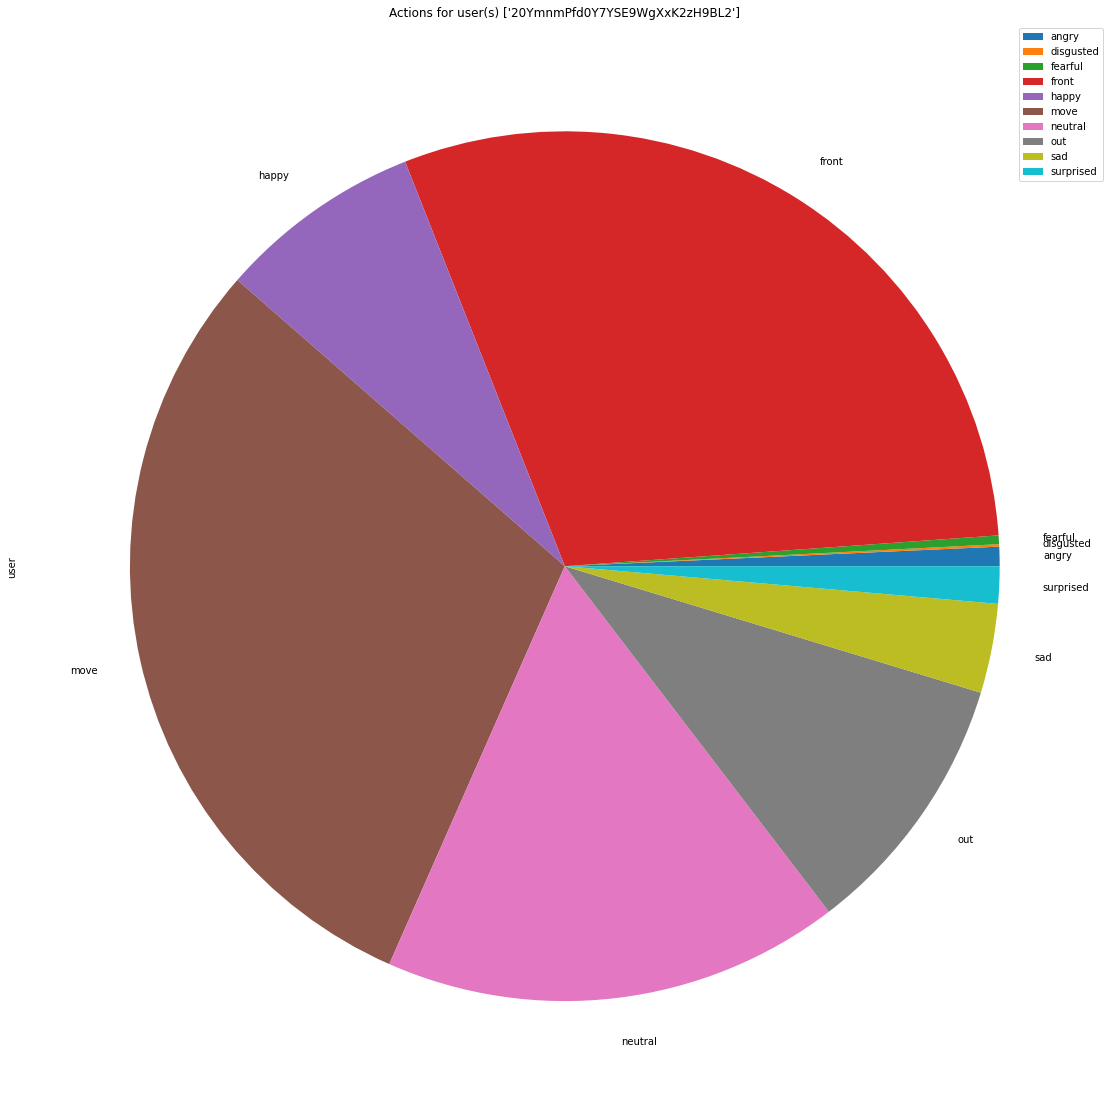

In [20]:
target_.plot.pie(y='user', figsize=(20,20), title=f"Actions for user(s) {target_users}");

### Bar plot

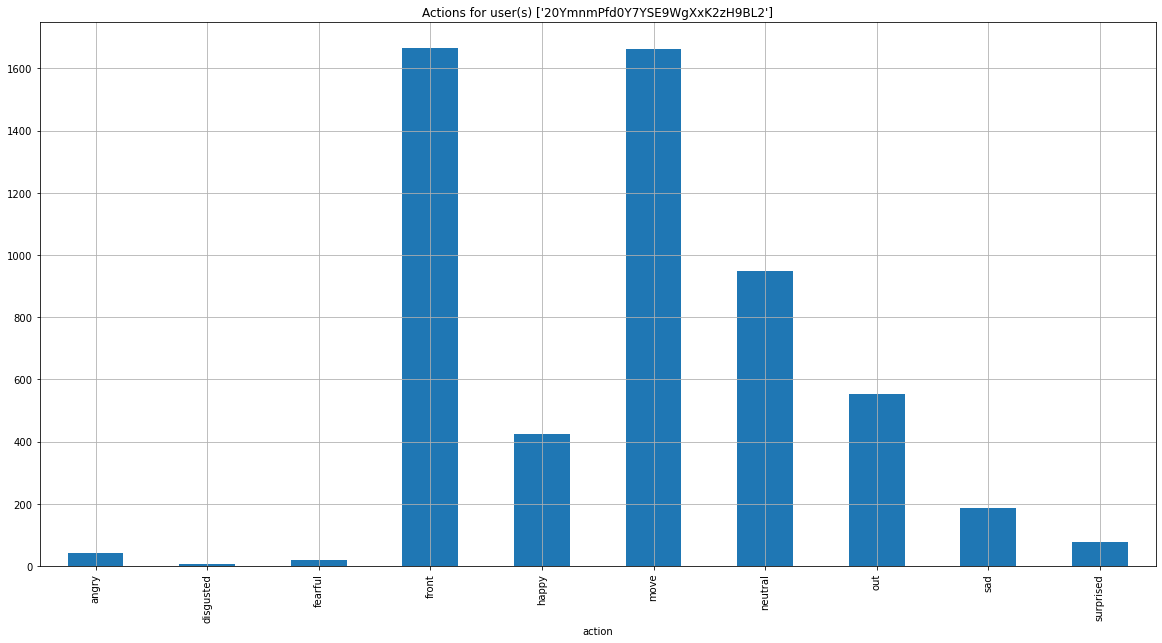

In [21]:
target_['user'].plot(kind='bar', title=f"Actions for user(s) {target_users}", figsize=(20,10), grid=True);

## 5. Inspect sessions

In [22]:
df_ts = df_.set_index('timestamp')

----------------------------------------------------

*Edit the user and session you want to plot*

In [23]:
target_user  = 'L6BaTzTY5AOuDbvyHAkIgAfq6yt1' #one at a time. Check list of users from cell 13.
target_session= 5 #one at a time. Check the list of users from cell 16.

--------------------------------------------------------

In [24]:
target_emotions= ['front', 'neutral', 'move', 'surprised', 'out', 'sad', 'angry', 'fearful', 'happy', 'disgusted']
target_actions= ['start', 'end', 'Theory' 'Practice' 'Doubts', 'NonAcInfo', 'AcInfo']

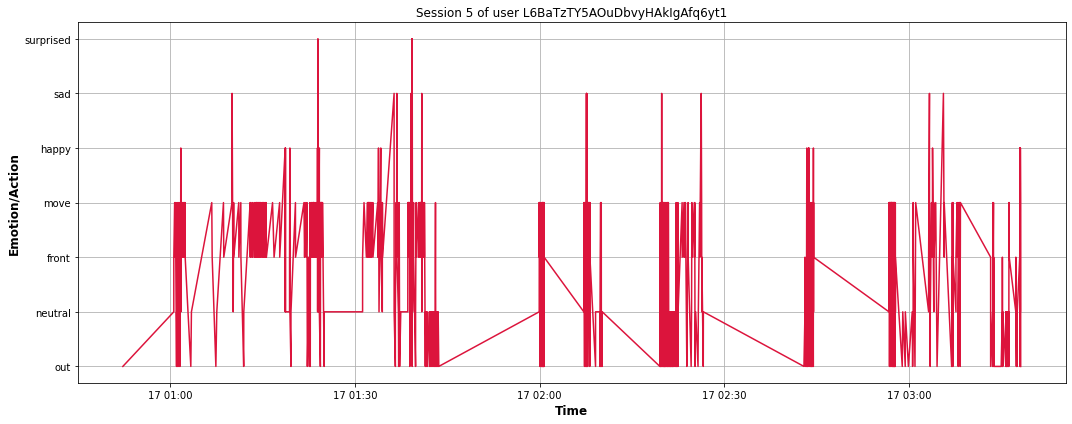

In [25]:
#Emotions
user_ts= df_ts[(df_ts['user']==target_user) & (df_ts['session_id']==target_session) & (df_ts['action'].isin(target_emotions))]
emotions = user_ts['action'].unique()
conversion = {}
i=0
for a in emotions:
    conversion[a]=i
    i+=1
    
y_converted = []
for v in user_ts['action'] :
    y_converted.append(conversion[v])

#Actions
user_act_ts= df_ts[(df_ts['user']==target_user) & (df_ts['session_id']==target_session) & (df_ts['action'].isin(target_actions))]
actions = user_act_ts['action'].unique()
show_actions=False
act_converted = []

if len(actions)>0:
    show_actions=True
    conversion_act = {}
    i=0
    for a in actions:
        conversion_act[a]=i
        i+=1

    for v in user_act_ts['action'] :
        act_converted.append(conversion_act[v])


fig, currAX = plt.subplots(figsize=(15, 6))

label_format = {'fontsize':12, 'fontweight':'bold'}
title_format = {'fontsize':15, 'fontweight':'bold'}

### pass as tuple
currAX.plot(user_ts.index, y_converted, color='crimson', linestyle='-')

currAX.set_xlabel('Time', **label_format)
currAX.set_ylabel('Emotion/Action', **label_format)

### tell matplotlib the ticks and labels to use on Y-axis
currAX.set_yticks( list(conversion.values()) )
currAX.set_yticklabels( list(conversion.keys()) )

if show_actions:
    currAX2 = currAX.twinx()
    currAX2.plot(user_act_ts.index, act_converted, color='blue', linestyle='-')
    ### tell matplotlib the ticks and labels to use on Y-axis for actions
    currAX2.set_yticks( list(conversion_act.values()) )
    currAX2.set_yticklabels( list(conversion_act.keys()) )

plt.title(f"Session {target_session} of user {target_user}")
plt.grid()

fig.tight_layout()
plt.show();

In [26]:
print("That's all folks")

That's all folks
